# Analysis of Results
This notebook parses the study results in the responses folder and analyzes the results.

## Parsing

In [139]:
# load all files in data
# create a dataframe with all data

import pandas as pd
import numpy as np
import os
import json
import matplotlib.pyplot as plt
import codecs

data = []
demo_surveys = ["-0"]
tutorial_surveys = ["-1", "-6", "-11", "-16"]
tlx_surveys = ["-5", "-10", "-15", "-20"]
for filename in os.listdir("data"):
    #if not filename.startswith("44"):
    #    continue

    is_tutorial = any([tut + ".json" in filename for tut in tutorial_surveys])
    is_tlx = any([tlx + ".json" in filename for tlx in tlx_surveys])
    is_demo = any([demo + ".json" in filename for demo in demo_surveys])

    if not filename.endswith(".json"):
        continue

    if is_tutorial or is_demo:
        continue

    if is_tlx:
        continue
    
    with codecs.open(os.path.join("data", filename), "rb", encoding="utf_8", errors='ignore') as f:
        d = json.load(f)
        data.append([d["response"]["duration"], d["task"]["view"]])

df = pd.DataFrame(data, columns=["duration", "view"])
df

,duration,view
0,91538,VR-NoDecomp
1,126018,VR-Decomp
2,90722,VR-Decomp
3,87704,Desktop-Decomp
4,197381,VR-Decomp
5,123127,Desktop-Decomp
6,246759,Desktop-Decomp
7,184583,Desktop-Decomp
8,69239,Desktop-NoDecomp
9,134994,VR-NoDecomp


In [140]:
# group df by view
grouped = df.groupby("view")
grouped.describe()

duration                                                   \
                    count           mean           std      min        25%   
view                                                                         
Desktop-Decomp        5.0  155037.800000  61892.642589  87704.0  123127.00   
Desktop-NoDecomp      6.0  139713.666667  49608.164053  69239.0  105864.50   
VR-Decomp             6.0  126458.166667  49812.681764  71485.0   92709.75   
VR-NoDecomp           6.0  134191.833333  32118.091646  91538.0  119685.50   

                                                 
                       50%        75%       max  
view                                             
Desktop-Decomp    133016.0  184583.00  246759.0  
Desktop-NoDecomp  147180.0  175788.25  197266.0  
VR-Decomp         112345.5  162357.00  197381.0  
VR-NoDecomp       128327.5  148235.25  185282.0

In [141]:
# add column that is 0 if Desktop-Decomp or Desktop-NoDecomp, 1 if VR-Decomp or VR-NoDecomp
df["platform"] = df["view"].apply(lambda x: 0 if x.startswith("Desktop") else 1)
df["decomp"] = df["view"].apply(lambda x: 0 if x.endswith("NoDecomp") else 1)

In [142]:
# linear regression for duration ~ platform + decomp
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols("duration ~ platform * decomp", data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               duration   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                 -0.101
Method:                 Least Squares   F-statistic:                    0.3300
Date:                Wed, 02 Aug 2023   Prob (F-statistic):              0.804
Time:                        17:16:08   Log-Likelihood:                -278.72
No. Observations:                  23   AIC:                             565.4
Df Residuals:                      19   BIC:                             570.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        1.397e+05   1.99e+04     

{'whiskers': [<matplotlib.lines.Line2D at 0x2a4083850>,
 'caps': [<matplotlib.lines.Line2D at 0x2a413fa90>,
 'boxes': [<matplotlib.lines.Line2D at 0x2a40fbaf0>,
 'medians': [<matplotlib.lines.Line2D at 0x2a413ffd0>,
 'fliers': [<matplotlib.lines.Line2D at 0x2a41702b0>,
 'means': []}

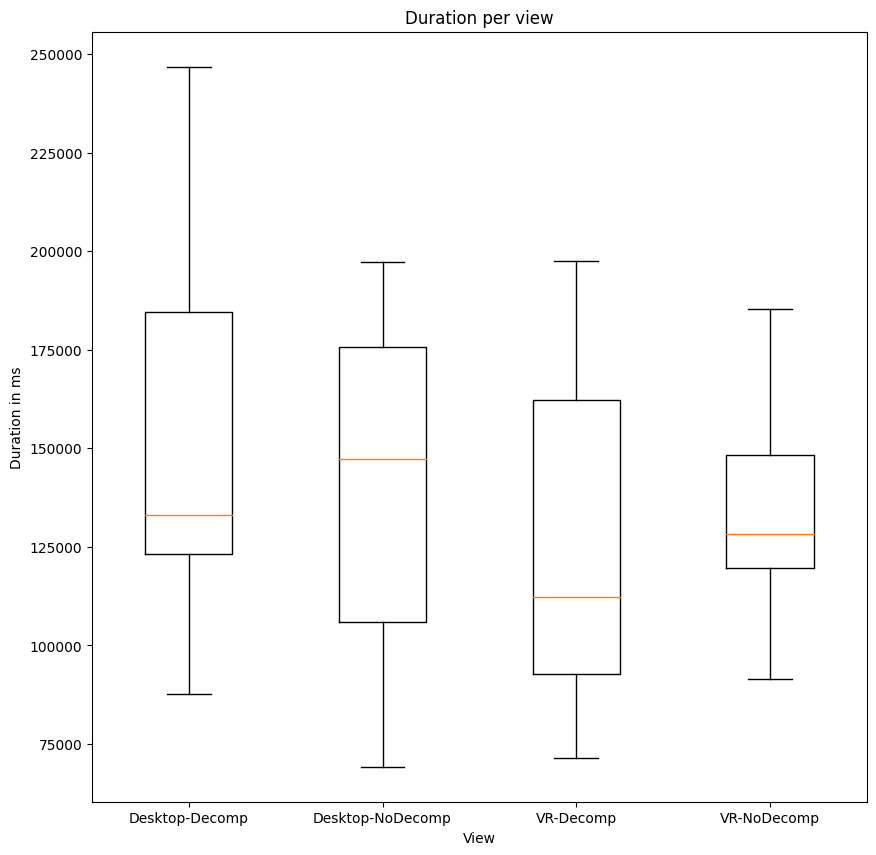

In [143]:
# boxplot for duration
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_title("Duration per view")
ax.set_ylabel("Duration in ms")
ax.set_xlabel("View")
ax.boxplot([grouped.get_group(view)["duration"].values for view in grouped.groups.keys()], labels=grouped.groups.keys(), bootstrap=10000)

## TLX

In [144]:
# load all files in data
# create a dataframe with all data

import pandas as pd
import numpy as np
import os
import json
import matplotlib.pyplot as plt
import codecs

data = []
demo_surveys = ["-0"]
tutorial_surveys = ["-1", "-6", "-11", "-16"]
tlx_surveys = ["-5", "-10", "-15", "-20"]
for filename in os.listdir("data"):
    #if not filename.startswith("44"):
    #    continue

    is_tutorial = any([tut + ".json" in filename for tut in tutorial_surveys])
    is_tlx = any([tlx + ".json" in filename for tlx in tlx_surveys])
    is_demo = any([demo + ".json" in filename for demo in demo_surveys])

    if not filename.endswith(".json"):
        continue

    if is_tutorial or is_demo:
        continue

    if not is_tlx:
        continue
    
    # is tlx:
    with codecs.open(os.path.join("data", filename), "rb", encoding="utf_8", errors='ignore') as f:
        d = json.load(f)
        i = d["task"]["stateId"] - 1
        d["response"]["condition"] = d["task"]["_views"][i]
        data.append([sum(d["response"]["scores"]["scores"]), d["response"]["condition"]])

df = pd.DataFrame(data, columns=["tlxsum", "condition"])
df

,tlxsum,condition
0,267,Desktop-Decomp
1,214,VR-Decomp
2,259,VR-NoDecomp
3,351,Desktop-Decomp
4,212,VR-Decomp
5,430,Desktop-NoDecomp
6,260,Desktop-NoDecomp
7,395,VR-NoDecomp


In [145]:
# group df by view
grouped = df.groupby("condition")
grouped.describe()

tlxsum                                                      
                  count   mean         std    min    25%    50%    75%    max
condition                                                                    
Desktop-Decomp      2.0  309.0   59.396970  267.0  288.0  309.0  330.0  351.0
Desktop-NoDecomp    2.0  345.0  120.208153  260.0  302.5  345.0  387.5  430.0
VR-Decomp           2.0  213.0    1.414214  212.0  212.5  213.0  213.5  214.0
VR-NoDecomp         2.0  327.0   96.166522  259.0  293.0  327.0  361.0  395.0

In [146]:
# add column that is 0 if Desktop-Decomp or Desktop-NoDecomp, 1 if VR-Decomp or VR-NoDecomp
df["platform"] = df["condition"].apply(lambda x: 0 if x.startswith("Desktop") else 1)
df["decomp"] = df["condition"].apply(lambda x: 0 if x.endswith("NoDecomp") else 1)

{'whiskers': [<matplotlib.lines.Line2D at 0x2a41f2fb0>,
 'caps': [<matplotlib.lines.Line2D at 0x2a41f34f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2a41f2d10>,
 'medians': [<matplotlib.lines.Line2D at 0x2a41f3a30>,
 'fliers': [<matplotlib.lines.Line2D at 0x2a41f3cd0>,
 'means': []}

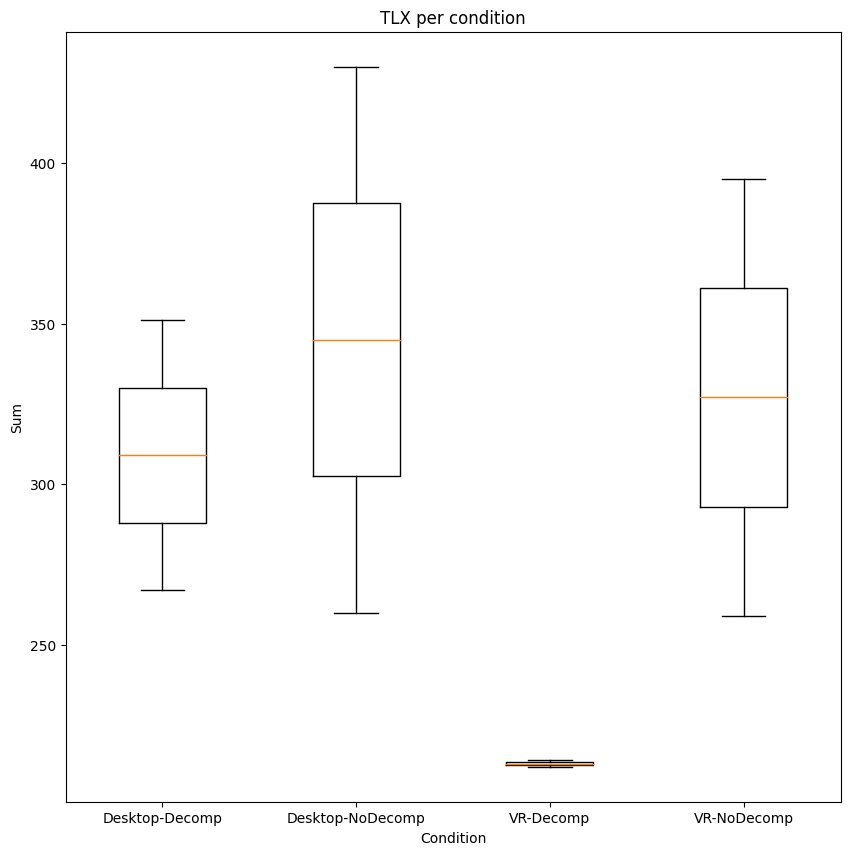

In [147]:
# boxplot for duration
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_title("TLX per condition")
ax.set_ylabel("Sum")
ax.set_xlabel("Condition")
ax.boxplot([grouped.get_group(view)["tlxsum"].values for view in grouped.groups.keys()], labels=grouped.groups.keys(), bootstrap=10000)